# Term Assignment
## Text mining 주제 선정 및 그 이유

![travel](travel.png)
![travel1](travel1.png)


위의 설문조사 내용은 숙박 및 항공권에 관한 여행 관련 온라인 예약 서비스를 제공하는 익스피디아에서 남녀 600여명을 대상으로 조사한 결과이다. 이에 따르면 특히 20대, 30대의 젊은 연령일수록 SNS가 여행 욕구를 자극하고 여행지 선정에 큰 영향을 끼친다는 것을 알 수 있다. 마침 방학 때 다녀올 여행지 선정에 고심하던 차에 참고할 만한 여행지 후보를 찾고, 내 또래 연령대의 사람들이 많이 가는 여행지를 알기 위해 인스타그램에서 정보를 수집해보기로 했다.

해시태그 수집 대상 계정으로 travelholic_insta를 선정하였다. travelholic_insta는 여행 관련 커뮤니티 사이트인 "여행에 미치다"의 공식 인스타그램 계정으로서 다양한 여행가들의 여행 사진과 이야기를 제보받아서 업로드한다.

## 데이터 수집 및 저장

In [43]:
from selenium import webdriver # 크롬웹드라이버를 사용하기 위해 셀레니움 모듈을 불러온다.
from bs4 import BeautifulSoup # DOM 구조를 파악하고 파싱하기 위해 bs4 모듈을 불러온다.
import time # 이 모듈을 통해 sleep 기능을 사용할 수 있다.

url = "https://www.instagram.com/travelholic_insta/" # 해시태그를 수집할 travelholic_insta 계정으로 접속하는 url이다.

USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64)" + \
                           "AppleWebKit/537.36 (KHTML, like Gecko)" + \
                           " Chrome/70.0.3538.77 Safari/537.36"
# 비정상적 접근으로 인식하지 않고, 차단 당하는 것을 방지하기 위해 사용한다. 

chrome_options = webdriver.ChromeOptions() # 크롬 구동 시 사용할 조건을 추가한다.
chrome_options.add_argument(USER_AGENT) # 차단 방지 목적.
chrome_options.add_argument("headless") # 크롬 구동 시 실제 브라우저와 동일하게 작동하지만 창이 뜨지 않게 하기 위함이다.

driver = webdriver.Chrome("C:/Users/Namlister/Downloads/chromedriver", options = chrome_options) 
# 앞서 설정한 조건으로 크롬드라이버를 불러온다.
driver.maximize_window() # 인스타그램 페이지는 동적 웹페이지이기에 창을 열 때 자동으로 최대크기로 열리도록 한다.
driver.get(url) # 크롬드라이버로 대상 인스타그램 계정에 접속한다.
driver.implicitly_wait(10) # 10초간 대기. 인스타그램 계정 페이지를 완전히 불러올 때까지 충분히 기다린다.

# 수집할 정보들을 담을 빈 리스트를 만들어준다.
contents = []
contents_list = []
hashtags = []

# 대상 인스타그램 계정 웹페이지의 소스코드에서 가장 최근 게시물을 찾고, 해당 게시물을 클릭하도록 한다.
driver.find_element_by_xpath("//*[@id='react-root']/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]/a/div[1]/div[2]").click()



# while문 설명
# time.sleep(3). 게시물을 클릭하면, 해당 게시물에 관한 새로운 창이 뜨기 때문에 창이 완전히 뜨고 해시태그를 빠짐없이 가져올 수 있도록
# 3초간 기다려주도록 한다.
# html = driver.page_source. 앞서 말했듯이 게시물을 클릭하면 새로운 창이 뜨기 때문에 현재 보이는 웹페이지의 소스코드를 새로이 가져온다.
# dom = BeautifulSoup(html, "html.parser"). HTML 소스를 파싱한다.
# contents = contents + dom.select("div.C4VMK > span > a"). 게시물의 해시태그들을 나타내는 소스코드를 찾아서 앞서 만든 빈 리스트에 
# 담는다.
# driver.find_element_by_xpath("//a[@class = 'HBoOv coreSpriteRightPaginationArrow']").click().
# 현재 게시물의 해시태그 관련 소스코드를 전부 수집하고 나면, 다음 게시물 창으로 넘어가는 화살표 아이콘을 클릭하도록 한다.

# driver.close(). 만약 게시물을 끝까지 다 봤다면 브라우저를 닫고 반복문을 멈추도록 한다.

while True:
        
    try:
        time.sleep(3) 
        html = driver.page_source
        dom = BeautifulSoup(html, "html.parser")
        
        
        contents = contents + dom.select("div.C4VMK > span > a")
        
        
        driver.find_element_by_xpath("//a[@class = 'HBoOv coreSpriteRightPaginationArrow']").click()
    except:
        driver.close()
        break
    

# 2초간 쉬어준다.        
time.sleep(2)


# 크롤링한 내용을 정제하는 작업을 실시한다.
# 첫 for문은 게시물에 관해 담아온 소스코드에서 불필요한 태그를 제거하고 텍스트 내용만 추려내서 contents_list라는 빈 리스트에 넣어준다.
for content in contents:
    contents_list.append(content.text)

# 리스트 contents_list의 텍스트 내용 중에서 해시태그만 추려내기 위해 리스트의 요소가 #로 시작하는 것만 뽑아서 
# 리스트 hashtags에 저장한다. 이 과정이 없으면 해시태그뿐만 아니라 게시물의 다른 텍스트 내용이 섞여있게 된다.
for x in contents_list: 
    if x[0] == "#":
        hashtags.append(x)

# 최종적으로 크롤링한 내용을 확인해본다. 해시태그만 출력된다면 성공한 것이다.       
print(hashtags)



['#여행에미치다', '#우유니', '#별', '#볼리비아', '#버킷리스트', '#여행에미치다', '#우붓', '#정글리조트', '#인피니티풀', '#플로팅조식', '#전동킥보드를', '#마리나베이스트리트서킷', '#싱가포르플라이어', '#포토존', '#머미', '#여행에미치다', '#싱가포르', '#마리나베이샌즈', '#Singapore', '#여행에미치다', '#이집트', '#피라미드', '#스핑크스', '#피자헛', '#Travel', '#Egypt', '#Pyramid', '#Sphinx', '#Pizzahut', '#여행에미치다', '#카자흐스탄', '#알마티', '#빅알마티호수', '#BigAlmatyLake', '#Kazakhstan', '#그래서_여미가_직접_다_가보고_소개해드림😍', '#여행에미치다', '#국내여행', '#서울맛집', '#삼미식당', '#블루보틀', '#딘타이펑', '#할랄가이즈', '#더앨리', '#타이거슈가', '#나이쏘이', '#쉐이크쉑', '#여행에미치다', '#개심사', '#용비지', '#서산', '#국내여행', '#한국', '#여행에미치다', '#리스본', '#포르투갈', '#Lisbon', '#Portugel', '#여행에미치다', '#해피비치', '#세부', '#세부여행', '#필리핀', '#Cebu', '#HappyBeach', '#Philippines', '#Pinky', '#여행에미치다', '#제주', '#광치기해변', '#제주도', '#제주여행', '#TriponGopro', '#TriponGopro', '#Tripon', '#고프로', '#여행에미치다', '#여행에미치다', '#TriponGopro', '#Tripon', '#고프로', '#고프로히어로7', '#액션캠', '#goprokr', '#여행에미치다', '#후후가와구치코', '#후지산', '#FufuKawaguchiko', '#MtFuji', '#여행에미치다', '#서호주', '#퍼스', '#호주', '#워킹홀리데이', '#westernaustr

In [56]:
import json # 텍스트 데이터 구조화를 위해 json 모듈을 불러온다.



OUTPUT_DATA = "TP_201521466/ym_data.jsonl" # 구조화 후 크롤링한 내용이 저장될 데이터 파일 경로.


ym_hashtags = hashtags # 수집한 해시태그를 ym_hashtags라는 변수에 저장한다.

# jsonl 형식. 크롤링한 해시태그를 보기 쉽게 하나씩 한 줄로 출력하려고 한다. 한글이기에 utf-8로 인코딩하고 앞서 설정한 경로로 저장한다.
with open(OUTPUT_DATA, "w", encoding = "utf-8") as output_data: 
    for ym_hashtag in ym_hashtags: # 리스트 ym_hashtags의 내용을 하나씩 json 문자열로 인코딩한다.   
        ym_data = json.dumps(ym_hashtag, ensure_ascii = False) # ensure_ascii를 Fasle로 설정해서 한글을 그대로 출력될 수 있도록 한다.
        print(ym_data, file = output_data) # 앞서 입력한 파일명과 경로에 따른 파일에 출력한다.
        
        
        



## 두 번째 과제를 위한 데이터 추가 수집

두 번째 과제를 진행하는 도중에, 첫 번째 과제 당시 수집한 데이터 양이 처음에 의도한 결과를 얻기에 부족하다고 판단해서 데이터를 추가로
수집하기로 했다. 추가 데이터 수집 대상이 되는 인스타그램 계정은 "travelaaalice"이다. 계정 주인은 여행가로서 자신의 여행 사진을
주기적으로 업로드한다. 처음 데이터 수집 대상이었던 계정은 여러 사람들의 여행사진이 선별된 것이라면, 추가로 데이터 수집 대상이 된 계정
은 한 개인의 모든 여행사진이 업로드된다.

In [72]:
from selenium import webdriver # 크롬웹드라이버를 사용하기 위해 셀레니움 모듈을 불러온다.
from bs4 import BeautifulSoup # DOM 구조를 파악하고 파싱하기 위해 bs4 모듈을 불러온다.
import time # 이 모듈을 통해 sleep 기능을 사용할 수 있다.

url1 = "https://www.instagram.com/travelaaalice/" # 해시태그를 수집할 travelholic_insta 계정으로 접속하는 url이다.

USER_AGENT1 = "Mozilla/5.0 (Windows NT 10.0; Win64; x64)" + \
                           "AppleWebKit/537.36 (KHTML, like Gecko)" + \
                           " Chrome/70.0.3538.77 Safari/537.36"
# 비정상적 접근으로 인식하지 않고, 차단 당하는 것을 방지하기 위해 사용한다. 

chrome_options1 = webdriver.ChromeOptions() # 크롬 구동 시 사용할 조건을 추가한다.
chrome_options1.add_argument(USER_AGENT1) # 차단 방지 목적.
chrome_options1.add_argument("headless") # 크롬 구동 시 실제 브라우저와 동일하게 작동하지만 창이 뜨지 않게 하기 위함이다.

driver1 = webdriver.Chrome("C:/Users/Namlister/Downloads/chromedriver", options = chrome_options1) 
# 앞서 설정한 조건으로 크롬드라이버를 불러온다.
driver1.maximize_window() # 인스타그램 페이지는 동적 웹페이지이기에 창을 열 때 자동으로 최대크기로 열리도록 한다.
driver1.get(url1) # 크롬드라이버로 대상 인스타그램 계정에 접속한다.
driver1.implicitly_wait(10) # 10초간 대기. 인스타그램 계정 페이지를 완전히 불러올 때까지 충분히 기다린다.

# 수집할 정보들을 담을 빈 리스트를 만들어준다.
contents1 = []
contents_list1 = []
hashtags1 = []

# 대상 인스타그램 계정 웹페이지의 소스코드에서 가장 최근 게시물을 찾고, 해당 게시물을 클릭하도록 한다.
driver1.find_element_by_xpath("//*[@id='react-root']/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]/a/div[1]/div[2]").click()



# while문 설명
# time.sleep(3). 게시물을 클릭하면, 해당 게시물에 관한 새로운 창이 뜨기 때문에 창이 완전히 뜨고 해시태그를 빠짐없이 가져올 수 있도록
# 3초간 기다려주도록 한다.
# html1 = driver1.page_source. 앞서 말했듯이 게시물을 클릭하면 새로운 창이 뜨기 때문에 현재 보이는 웹페이지의 소스코드를 새로이 가져온다.
# dom1 = BeautifulSoup(html1, "html.parser"). HTML 소스를 파싱한다.
# contents1 = contents1 + dom1.select("div.C4VMK > span > a"). 게시물의 해시태그들을 나타내는 소스코드를 찾아서 앞서 만든 빈 리스트에 
# 담는다.
# driver1.find_element_by_xpath("//a[@class = 'HBoOv coreSpriteRightPaginationArrow']").click().
# 현재 게시물의 해시태그 관련 소스코드를 전부 수집하고 나면, 다음 게시물 창으로 넘어가는 화살표 아이콘을 클릭하도록 한다.

# driver1.close(). 만약 게시물을 끝까지 다 봤다면 브라우저를 닫고 반복문을 멈추도록 한다.

while True:
        
    try:
        time.sleep(3) 
        html1 = driver1.page_source
        dom1 = BeautifulSoup(html1, "html.parser")
        
        
        contents1 = contents1 + dom1.select("div.C4VMK > span > a")
        
        
        driver1.find_element_by_xpath("//a[@class = 'HBoOv coreSpriteRightPaginationArrow']").click()
    except:
        driver1.close()
        break
    

# 2초간 쉬어준다.        
time.sleep(2)


# 크롤링한 내용을 정제하는 작업을 실시한다.
# 첫 for문은 게시물에 관해 담아온 소스코드에서 불필요한 태그를 제거하고 텍스트 내용만 추려내서 contents_list라는 빈 리스트에 넣어준다.
for content1 in contents1:
    contents_list1.append(content1.text)

# 리스트 contents1_list의 텍스트 내용 중에서 해시태그만 추려내기 위해 리스트의 요소가 #로 시작하는 것만 뽑아서 
# 리스트 hashtags1에 저장한다. 이 과정이 없으면 해시태그뿐만 아니라 게시물의 다른 텍스트 내용이 섞여있게 된다.
for x1 in contents_list1: 
    if x1[0] == "#":
        hashtags1.append(x1)

# 최종적으로 크롤링한 내용을 확인해본다. 해시태그만 출력된다면 성공한 것이다.       
print(hashtags1)


['#일상을여행으로', '#여행에미치다', '#서울', '#Seoul', '#Korea', '#따릉이', '#여행에미치다', '#싱가포르', '#싱가폴여행', '#레브레브', '#singapore', '#OasiaHotel', '#여행에미치다', '#파리', '#에펠탑', '#Paris', '#France', '#싱가포르', '#포트캐닝파크', '#여행에미치다', '#singapore', '#fortcanning', '#fortcanningpark', '#여행에미치다', '#싱가포르', '#가든스바이더베이', '#여미직원', '#아시아나승무원', '#여행하는직업', '#Singapore', '#gardenbythebay', '#올리브데올리브', '#올리브데올리브리조트룩', '#리조트룩', '#휴양지패션', '#바캉스웨어', '#여름원피스', '#쉬폰원피스', '#여행패션', '#여행에미치다', '#하지레인', '#싱가포르', '#Hajilane', '#Singapore', '#Arabstreet', '#싱가포르', '#리틀인디아', '#여행에미치다', '#singapore', '#littleindia', '#visitsingapore', '#여행에미치다', '#싱가포르', '#승무원', '#아시아나', '#singapore', '#Cabincrew', '#asianaairlines', '#여행에미치다', '#뉴욕', '#메종드뉴욕', '#뉴욕여행', '#라디오시티', '#NYC', '#newyork', '#newyorkcity', '#prettycitynewyork', '#여행에미치다', '#ㅋㅋ페스티벌', '#난지한강공원', '#페스티벌', '#여미', '#배민', '#배달의민족', '#베르동', '#남프랑스', '#여름코디', '#여행에미치다', '#휴양지룩', '#오이쇼', '#Oysho', '#Summeroutfits', '#새로보다', '#세로데이', '#더세로', '#더세리프', '#더프레임', '#여행에미치다', '#다이센', '#다이센목장', '

In [73]:
import json # 텍스트 데이터 구조화를 위해 json 모듈을 불러온다.



OUTPUT_DATA1 = "TP_201521466/alice_data.jsonl" # 구조화 후 크롤링한 내용이 저장될 데이터 파일 경로.


alice_hashtags = hashtags1 # 수집한 해시태그를 alice_hashtags라는 변수에 저장한다.

# jsonl 형식. 크롤링한 해시태그를 보기 쉽게 하나씩 한 줄로 출력하려고 한다. 한글이기에 utf-8로 인코딩하고 앞서 설정한 경로로 저장한다.
with open(OUTPUT_DATA1, "w", encoding = "utf-8") as output_data1: 
    for alice_hashtag in alice_hashtags: # 리스트 alice_hashtags의 내용을 하나씩 json 문자열로 인코딩한다.   
        alice_data = json.dumps(alice_hashtag, ensure_ascii = False) # ensure_ascii를 Fasle로 설정해서 한글을 그대로 출력될 수 있도록 한다.
        print(alice_data, file = output_data1) # 앞서 입력한 파일명과 경로에 따른 파일에 출력한다.

## 빈도 분석 및 형태소 분석 시도

In [1]:
import ujson 
import re
from collections import Counter

# 앞서 수집한 해시태그들을 저장했던 파일.
INPUT_DATA0 = "TP_201521466/ym_data.jsonl"
INPUT_DATA1 = "TP_201521466/alice_data.jsonl"

# 불러올 파일 안의 해시태그 데이터를 저장하기 위한 빈 리스트를 만든다.
ym_tags = []
alice_tags = []

def freq_object(input_file): # 파일들을 불러오는 함수이다.
    
    freq_result = []

    with open(input_file, 'r', encoding='utf-8') as input_data: 
        for line in input_data: # 매개변수 input_file은 불러올 파일이고, 파일 데이터를 하나씩 ujson.load로 가져와서 
            data = ujson.loads(line) # 빈 리스트 freq_result에 저장한다.
            freq_result.append(data)
            
    return freq_result # 불러온 파일 데이터를 담은 리스트를 반환한다.

# 두 인스타그램 계정에서 추출한 해시태그 데이터들을 각각 ym_tags, alice_tags로 저장한다.
ym_tags = freq_object(INPUT_DATA0)
alice_tags = freq_object(INPUT_DATA1)

In [2]:
from collections import Counter # Counter 함수 쓰기 위해 모듈 추가.

# 해시태그 데이터들을 정제하고, 각 해시태그의 빈도 분석을 위한 함수를 생성한다. 
def hashtag_counter(hashtag_data): # 매개변수 hashtag_data에 해시태그 데이터를 저장한 변수를 넣는다.
    
    
    data_refine = [re.sub("[^#가-힣a-zA-Z0-9_]", "", e) for e in hashtag_data] # 한글, 영어대소문자, 숫자, #, 언더바만 읽어들인다.
    freq = Counter(data_refine) # 데이터 정제 후 선별된 해시태그들의 빈도를 세어준다.
    
    return freq # 결과값 반환.

# 두 인스타그램 계정의 정제된 해시태그들의 빈도 분석 결과를 따로 저장한다.
ym_wordcount = hashtag_counter(ym_tags)
alice_wordcount = hashtag_counter(alice_tags)


# 별개로 추후에 형태소분석을 위해 해시태그 중 한글과 숫자만 선별해서 저장해 준다.    
ym_freq_K = [re.sub("[^가-힣0-9_]", "", e) for e in ym_tags]
alice_freq_K = [re.sub("[^가-힣0-9_]", "", e) for e in alice_tags]


print(ym_wordcount) # travelholic_insta 계정에서 추출한 해시태그들을 정제한 후 빈도 분석을 한 결과 출력.


Counter({'#여행에미치다': 1089, '#Travelholic': 549, '#일상을여행으로': 481, '#Korea': 168, '#국내여행': 90, '#대한민국': 78, '#유럽여행': 68, '#Japan': 63, '#Europe': 61, '#일본': 51, '#서울': 46, '#Seoul': 45, '#제주도': 43, '#USA': 43, '#Jeju': 41, '#France': 41, '#프랑스': 40, '#제주': 39, '#파리': 36, '#미국': 35, '#Paris': 33, '#태국': 27, '#스위스': 27, '#일본여행': 26, '#제주여행': 25, '#Italy': 24, '#Thailand': 24, '#발리': 23, '#이탈리아': 23, '#Bali': 22, '#한국': 21, '#필리핀': 21, '#뉴질랜드': 21, '#Switzerland': 21, '#베트남': 20, '#Indonesia': 20, '#travelholic': 20, '#Spain': 19, '#유럽': 19, '#스페인': 19, '#인도네시아': 19, '#Philippines': 18, '#미국여행': 18, '#부산': 17, '#홍콩': 17, '#프라하': 17, '#포르투갈': 16, '#호주': 15, '#Hongkong': 15, '#Tokyo': 15, '#Sunset': 15, '#Busan': 15, '#러시아': 15, '#Prague': 15, '#VietNam': 14, '#Portugal': 14, '#오사카': 14, '#뉴욕': 14, '#Turkey': 14, '#벚꽃': 14, '#NewZealand': 13, '#도쿄': 13, '#멕시코': 13, '#터키': 13, '#Russia': 13, '#오스트리아': 13, '#체코': 13, '#부다페스트': 13, '#': 12, '#Australia': 12, '#Mexico': 12, '#카파도키아': 12, '#Cappado

In [10]:
print(alice_wordcount) # travelaaalice 계정에서 추출한 해시태그들을 정제한 후 빈도 분석을 한 결과 출력.

Counter({'#여행에미치다': 612, '#여행스타그램': 350, '#여행사진': 283, '#여행': 273, '#Travelgram': 209, '#Travel': 207, '#travelholic': 160, '#셀피': 145, '#instagram': 144, '#selfie': 142, '#Traveling': 140, '#photooftheday': 136, '#instagood': 110, '#travelgram': 105, '#셀카': 101, '#TravelHolic': 100, '#NYC': 95, '#여미': 95, '#뉴욕': 90, '#오오티디': 89, '#감성사진': 85, '#Traveler': 84, '#awesomeearth': 79, '#세계여행': 78, '#유럽여행': 77, '#데이트': 69, '#picoftheday': 69, '#traveling': 65, '#얼스타그램': 65, '#스냅사진': 64, '#뉴욕여행': 63, '#미국여행': 63, '#인생샷': 63, '#Instagram': 63, '#traveltheworld': 63, '#vscocam': 62, '#Picoftheday': 62, '#travellife': 62, '#국내여행': 61, '#사진스타그램': 61, '#해외여행': 60, '#여행스냅': 60, '#Korea': 59, '#캐논': 59, '#아이폰': 59, '#vsco': 58, '#세계일주': 57, '#iphone': 57, '#셀스타그램': 55, '#일상을여행으로': 52, '#Instagood': 52, '#Cebu': 52, '#': 51, '#세부': 51, '#wonderful_places': 50, '#AliceinNYC': 49, '#travel': 48, '#ig_capture': 48, '#TravelGram': 48, '#selca': 48, '#NewYork': 47, '#오키나와': 46, '#iphoneonly': 45, '#welltr


아무래도 travelholic_insta 계정은 여행에미치다의 공식적인 계정이다 보니, travelaaalice 계정에 비해서 여행지나 여행 관련 테마와 같이 
여행에 직접적으로 관련된 해시태그들이 더 많이 등장하고 빈도도 높은 편이다. 반면에 travelaaalice 계정은 한 개인의 여행기록 계정이다 
보니 본인이 사용하는 "카메라, 아이폰, 셀카, 데이트, 오오티디, 얼스타그램"과 같이 자신에 관한 해시태그와 팔로워를 늘리기 위해 계정 
홍보를 위한 해시태그들이 훨씬 더 많이 등장한다.

여행에미치다의 공식계정의 해시태그를 살펴보면 사람들이 해외보다는 쉽게 갈 수 있는 국내여행을 많이 갔다는 걸 알 수 있다. 그리고 여전히
유럽은 여행지로서 인기가 많은데 특히 프랑스가 가장 인기가 많다. 그 다음이 스위스, 이탈리아, 스페인 순인 것을 볼 수 있다. 대체로 아시아
지역은 대한민국과 가깝기 때문에 관련 게시물이 많이 올라온다. 주목할만한 점은 가장 가까운 중국과 일본 중에서 일본을 여행지로 선택한
사람들이 압도적으로 많은 반면 중국은 물리적으로 가까운 것 치고는 사람들에게 그리 사랑받는 여행지가 아니라는 것이다. 게다가 중국 여행지
중에서도 서양의 영향을 많이 받은 홍콩을 더 선호한다는 것을 알 수 있다.

travelaaalice 계정의 해시태그에도 쉽게 갈 수 있다는 점에서 국내여행에 관한 게시물이 많다는 걸 알 수 있다. 다만 사람들이 많이 모이는
뉴욕, 유럽에 관한 해시태그의 빈도가 높다는 걸 주목할 필요가 있다. 뉴욕 여행이 마음에 들었나 보다. 재밌는 점은 국내, 아시아, 유럽, 미국,
남미 등등 다양한 곳을 가보았으나 이 분도 중국은 여행지로서 선호하지 않는 것 같다. 여행에미치다 공식계정과의 또 하나의 공통점은 스위스
여행에 관한 해시태그의 빈도가 높다는 것이다.

두 계정 간에 해시태그가 비슷하다는 걸 알 수 있다. 그리고 다른 나라 특유의 자연 경관적 특성을 경험해 볼 수 있는 여행보다는 대도시 여행을 좀 더 선호하는 것 같다.



## 빈도 분석 결과 저장

In [14]:
import json

ym_freq_save_route = "TP_201521466/ym_data_freq.jsonl" # 저장될 데이터 파일 경로.
alice_freq_save_route = "TP_201521466/alice_data_freq.jsonl"



def freq_result_save(data, save_route): # 저장할 데이터와 저장될 경로를 매개변수로 받는 함수이다.
# jsonl 형식. 한글이기에 utf-8로 인코딩하고 앞서 설정한 경로로 저장한다.
    with open(save_route, "w", encoding = "utf-8") as freq_output_data: 
        for datum in data:    
            freq_result = json.dumps(data, ensure_ascii = False) # ensure_ascii를 Fasle로 설정해서 한글을 그대로 출력될 수 있도록 한다.
            print(freq_result, file = freq_output_data)

# 두 인스타그램 계정의 해시태그 빈도 분석 결과를 따로 저장한다.
ym_freq_save = freq_result_save(ym_wordcount, ym_freq_save_route)
alice_freq_save = freq_result_save(alice_wordcount, alice_freq_save_route)

In [11]:
from konlpy.tag import Okt # 형태소 분석을 위한 모듈 불러오기.

okt = Okt() # Okt 분석기 소환.

def Korean_morphing(data): # 매개변수 data에 앞서서 만들어놓은 한글과 숫자만 선별한 해시태그 데이터들을 넣을 것이다.
    
    morphing_result = []
    
    for datum in data:
        morphing_result.append(okt.morphs(datum)) # morphs 함수로 형태소 분석을 한다.
    
    return morphing_result

Korean_morphing(ym_freq_K) # travelaaalice 계정의 한글 및 숫자 해시태그 데이터 형태소 분석 결과 출력.

[['여행', '에', '미치다'],
 ['우유', '니'],
 ['별'],
 ['볼리비아'],
 ['버킷리스트'],
 ['여행', '에', '미치다'],
 ['우', '붓'],
 ['정글', '리조트'],
 ['인피니티', '풀'],
 ['플로', '팅', '조식'],
 ['전', '동', '킥', '보드', '를'],
 ['마리나', '베이', '스트리트', '서킷'],
 ['싱가포르', '플라이', '어'],
 ['포토', '존'],
 ['머', '미'],
 ['여행', '에', '미치다'],
 ['싱가포르'],
 ['마리나', '베이', '샌', '즈'],
 [],
 ['여행', '에', '미치다'],
 ['이집트'],
 ['피라미드'],
 ['스핑크스'],
 ['피자헛'],
 [],
 [],
 [],
 [],
 [],
 ['여행', '에', '미치다'],
 ['카자흐스탄'],
 ['알마티'],
 ['빅', '알마티', '호수'],
 [],
 [],
 ['그래서', '_', '여', '미가', '_', '직접', '_', '다', '_', '가보고', '_', '소개', '해드림'],
 ['여행', '에', '미치다'],
 ['국내', '여행'],
 ['서울', '맛집'],
 ['삼', '미식', '당'],
 ['블루', '보틀'],
 ['딘타이펑'],
 ['할랄', '가이즈'],
 ['더', '앨리'],
 ['타이거', '슈가'],
 ['나이', '쏘이'],
 ['쉐이크', '쉑'],
 ['여행', '에', '미치다'],
 ['개심사'],
 ['용비', '지'],
 ['서산'],
 ['국내', '여행'],
 ['한국'],
 ['여행', '에', '미치다'],
 ['리스본'],
 ['포르투갈'],
 [],
 [],
 ['여행', '에', '미치다'],
 ['해피', '비치'],
 ['세부'],
 ['세부', '여행'],
 ['필리핀'],
 [],
 [],
 [],
 [],
 ['여행', '에', '미치다'],
 ['제주'],
 ['광', '치기', '해

In [25]:
Korean_morphing(alice_freq_K) # travelholic_insta 계정의 한글 및 숫자 해시태그 데이터 형태소 분석 결과 출력.

[['일상', '을', '여행', '으로'],
 ['여행', '에', '미치다'],
 ['서울'],
 [],
 [],
 ['따릉', '이'],
 ['여행', '에', '미치다'],
 ['싱가포르'],
 ['싱가폴', '여행'],
 ['레브레브'],
 [],
 [],
 ['여행', '에', '미치다'],
 ['파리'],
 ['에펠탑'],
 [],
 [],
 ['싱가포르'],
 ['포트', '캐닝', '파크'],
 ['여행', '에', '미치다'],
 [],
 [],
 [],
 ['여행', '에', '미치다'],
 ['싱가포르'],
 ['가든', '스', '바이', '더', '베이'],
 ['여', '미', '직원'],
 ['아시아나', '승무원'],
 ['여행', '하는', '직업'],
 [],
 [],
 ['올리브', '데', '올리브'],
 ['올리브', '데', '올리브', '리조트', '룩'],
 ['리조트', '룩'],
 ['휴양지', '패션'],
 ['바캉스', '웨어'],
 ['여름', '원피스'],
 ['쉬폰', '원피스'],
 ['여행', '패션'],
 ['여행', '에', '미치다'],
 ['하지', '레인'],
 ['싱가포르'],
 [],
 [],
 [],
 ['싱가포르'],
 ['리틀', '인디아'],
 ['여행', '에', '미치다'],
 [],
 [],
 [],
 ['여행', '에', '미치다'],
 ['싱가포르'],
 ['승무원'],
 ['아시아나'],
 [],
 [],
 [],
 ['여행', '에', '미치다'],
 ['뉴욕'],
 ['메종드', '뉴욕'],
 ['뉴욕', '여행'],
 ['라디오시티'],
 [],
 [],
 [],
 [],
 ['여행', '에', '미치다'],
 ['페스티벌'],
 ['난', '지', '한강', '공원'],
 ['페스티벌'],
 ['여', '미'],
 ['배민'],
 ['배달', '의', '민족'],
 ['베', '르동'],
 ['남', '프랑스'],
 ['여름', '코디'],
 ['여행', '에',


해시태그 하나하나를 그대로 빈도 분석 대상으로 삼지 않고, 한글 해시태그를 대상으로 형태소 분석을 한 다음에 그걸 바탕으로 새로운 빈도
분석을 하려고 하였다. 그러나 위 결과에서 보다시피 해시태그 특성상 띄어쓰기가 없고, 외래어랑 외국어가 많이 포함되어 있어서 옛 트위터 
분석기인 Okt 분석기를 사용했음에도 불구하고 제대로 된 유의미한 결과를 얻기 힘든 것을 알 수 있다.



## 빈도 분석 결과 시각화

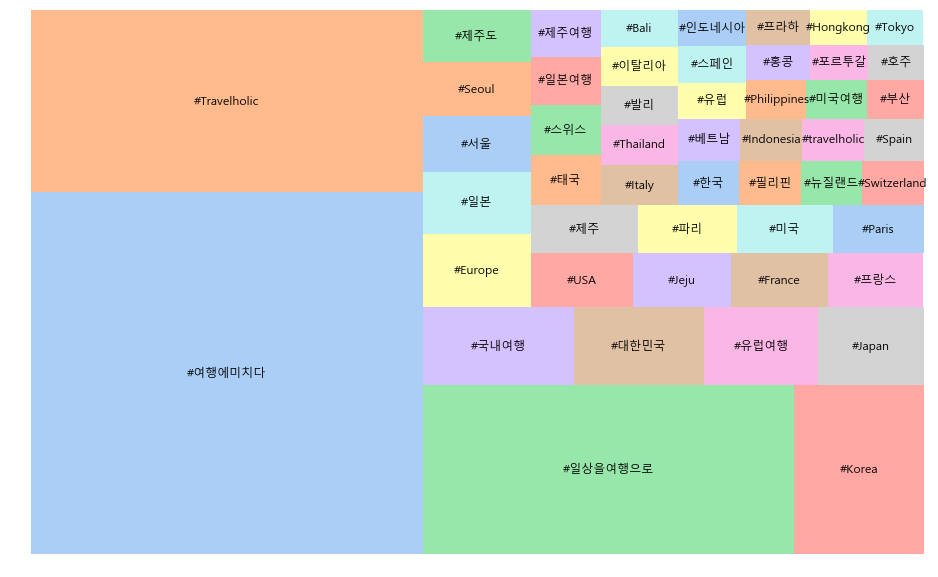

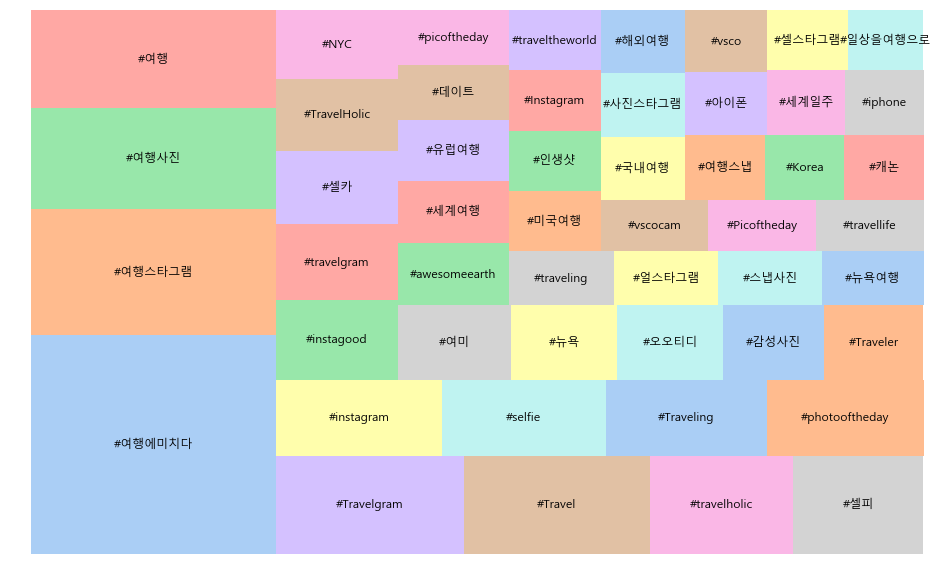

In [26]:
import sys # 파이썬 인터프리터가 제공하는 변수들과 함수들을 직접 제어할 수 있게 해주는 모듈
import squarify # 사각 그래프 관련 기능 제공
import matplotlib # 그래프 그리기 위해 불러온다.
import matplotlib.pyplot as plt # matplotlib의 스타일 관련 기능을 활용할 수 있도록 하는 모듈.
import seaborn as sns # matplotlib을 기반으로 다양한 시각화 기능을 추가한 모듈.


def visualization(data): # 시각화를 위한 함수 생성. 
    
    COLORS = sns.color_palette("pastel") # 그래프 색을 파스텔색으로 지정.
    matplotlib.rc("font", family = "malgun gothic") # 전체 글자 폰트를 malgun gothic으로 설정.
    words, counts = zip(*data.most_common(50)) # 시각화할 데이터의 가장 빈도가 높은 순으로 50개를 추린다.

    squarify.plot(sizes = counts, label= words, color = COLORS, alpha = 0.9, text_kwargs = {'fontsize': 12})
    # 빈도가 높을수록 사이즈가 크고 해시태그가 표시되도록 한다. 투명도는 0.9로 설정.

    plt.axis("off") # 축 표시 제거.
    plt.gcf().set_size_inches(16, 10) # 전체 그래프 사이즈 지정.
    return plt.show()

# 두 인스타그램 계정의 해시태그 빈도 분석 결과를 각각 나타낸다.
ym_infographic = visualization(ym_wordcount)
alice_infographic = visualization(alice_wordcount)

## TF-IDF 분석

In [16]:
import math # 로그개념을 사용하기 위해 math 모듈을 불러온다.
from itertools import chain # chain은 동일 형식의 데이터를 묶어준다.

total_tags_count = [ym_wordcount, alice_wordcount] # 해시태그 빈도 분석 결과 두 개를 하나의 리스트에 넣어 저장한다. 
ym_tags_set = [re.sub("[^#가-힣a-zA-Z0-9_]", "", e) for e in ym_tags] # travelholic_insta 계정에서 추출한 해시태그 정제.
alice_tags_set = [re.sub("[^#가-힣a-zA-Z0-9_]", "", e) for e in alice_tags] # travelaaalice 계정에서 추출한 해시태그 정제.
total_tags = list(chain(ym_tags_set, alice_tags_set)) # 정제된 데이터들을 chain 함수로 합쳐서 리스트 안에 저장한다.

def tfidf_analysis(data, tag_set): # TF-IDF 분석을 위한 함수를 생성한다.
    
    hashtags_freqs = []
    
    for datum in data: # 매개변수로 입력받은 데이터를 활용하는 첫 for문이다. TF, 즉 로그스케일 빈도를 계산하기 위함이다.

        hashtags_freq = Counter() # 횟수를 세어주기 위해 생성.

        for word, count in datum.items(): # 빈도 분석 결과의 빈도를 로그스케일로 만들고, 해시태그와 로그값을 묶는다.
            hashtags_freq[word] = math.log(count + 1) # 1 더하는 이유는 log0이 되는 걸 막기 위해서다.

        hashtags_freqs.append(hashtags_freq) # 튜플을 리스트에 만들어 놓은 빈 리스트에 저장한다.
        
   
    hashtags = set(tag_set) # 전체 단어를 하나의 set으로 합친다.
    doc_freqs = Counter() 

    for hashtag in hashtags: # 집합의 요소가 합친 데이터에 있을 때마다 카운팅 해준다. 따라서 각 데이터 안에서의 빈도를 알 수 있다. 
        for tag in tag_set:
            if hashtag in tag:
                doc_freqs[hashtag] += 1
        
    
    idf = Counter()
    for tags, counting in doc_freqs.items(): # IDF를 측정한다. 전체 해시태그 개수들을 각 데이터 안에서의 빈도로 나누어 준다.
        idf[tags] = math.log(len(tag_set) / (counting + 1))
        
        
    tfidfs = []
    for hash_freq in hashtags_freqs: # 위에서 구한 TF와 IDF를 서로 곱해주어서 TF-IDF의 측정값을 얻어낸다.
        
        tfidf = Counter()
        
        for tag, freq in hash_freq.items():
            tfidf[tag] = freq * idf[tag]

        tfidfs.append(tfidf)
#         TF-IDF 측정결과를 반환한다. 높을수록 자주 나오는 해시태그이며 또한 양쪽 계정에서 많이 나오는 해시태그가 아니라는 뜻이다.
#         이로써 너무 자주 나오는 해시태그는 어느 정도 걸러낼 수 있다.

    return tfidfs 

# 두 데이터 해시태그 빈도 분석 결과와 전체 해시태그를 합친 데이터를 매개변수로 넣는다.
tfidf_test = tfidf_analysis(total_tags_count, total_tags) 

tfidf_test # 전체 분석 결과

[Counter({'#여행에미치다': 18.316595675129598,
          '#우유니': 18.442420022863196,
          '#별': 7.4735700091150665,
          '#볼리비아': 18.82547007223529,
          '#버킷리스트': 15.790910974306845,
          '#우붓': 12.025464171270619,
          '#정글리조트': 6.493185099553511,
          '#인피니티풀': 9.28480663500404,
          '#플로팅조식': 6.493185099553511,
          '#전동킥보드를': 6.493185099553511,
          '#마리나베이스트리트서킷': 6.493185099553511,
          '#싱가포르플라이어': 6.493185099553511,
          '#포토존': 6.012732085635309,
          '#머미': 6.493185099553511,
          '#싱가포르': 10.391501396136409,
          '#마리나베이샌즈': 6.212138103052903,
          '#Singapore': 11.463370178269404,
          '#이집트': 15.790910974306845,
          '#피라미드': 9.84600594263991,
          '#스핑크스': 6.493185099553511,
          '#피자헛': 6.493185099553511,
          '#Travel': 5.8056198626963935,
          '#Egypt': 15.790910974306845,
          '#Pyramid': 9.84600594263991,
          '#Sphinx': 6.493185099553511,
          '#Pizzahu

In [18]:
tfidf_test[0].most_common() # 값이 높은 순서대로 정리한 travelholic_insta 분석 결과

[('#대한민국', 24.65239208032616),
 ('#Japan', 23.66980592358293),
 ('#Korea', 23.49593234025702),
 ('#일상을여행으로', 23.355330269076834),
 ('#Travelholic', 23.2356868561027),
 ('#France', 22.908205087606028),
 ('#Europe', 22.86038120696335),
 ('#국내여행', 22.72098553047231),
 ('#제주도', 22.275427378922195),
 ('#프랑스', 22.21939970168228),
 ('#USA', 22.104683095455965),
 ('#Paris', 21.97695488712402),
 ('#Seoul', 21.88844892247876),
 ('#제주여행', 21.590903745961832),
 ('#Jeju', 21.567750397770137),
 ('#유럽여행', 21.497517755533085),
 ('#Indonesia', 21.36131531215443),
 ('#Bali', 21.211606635407207),
 ('#뉴질랜드', 21.148780473393533),
 ('#Italy', 21.129748857421227),
 ('#발리', 21.060473055287776),
 ('#Thailand', 21.033655876038036),
 ('#Switzerland', 21.02754758398575),
 ('#인도네시아', 21.018988361943368),
 ('#프라하', 20.725299021532926),
 ('#일본', 20.4298424074203),
 ('#태국', 20.423106402860267),
 ('#포르투갈', 20.315446823388104),
 ('#파리', 20.286793539211278),
 ('#Prague', 20.207304231195625),
 ('#이탈리아', 20.09535399690702

In [19]:
tfidf_test[1].most_common() # 값이 높은 순서대로 정리한 travelaaalice 분석 결과

[('#셀피', 25.302899613045447),
 ('#instagram', 25.302208938442647),
 ('#photooftheday', 25.292894753865966),
 ('#instagood', 25.202122727283026),
 ('#Traveling', 25.194234704567045),
 ('#Travelgram', 25.179395629833383),
 ('#travelgram', 25.170418321855074),
 ('#selfie', 25.163610075742522),
 ('#셀카', 25.140706150448317),
 ('#TravelHolic', 25.132619978703787),
 ('#오오티디', 25.0235471104262),
 ('#감성사진', 24.973234985009558),
 ('#NYC', 24.94741849327128),
 ('#여행사진', 24.902621366911593),
 ('#awesomeearth', 24.884681286142815),
 ('#Traveler', 24.85630060167892),
 ('#travelholic', 24.707495841880213),
 ('#picoftheday', 24.693689833506262),
 ('#여행스타그램', 24.615577008223426),
 ('#traveling', 24.59821034621788),
 ('#얼스타그램', 24.59821034621788),
 ('#스냅사진', 24.57230463521376),
 ('#traveltheworld', 24.54552017977502),
 ('#vscocam', 24.517821728376855),
 ('#Picoftheday', 24.517821728376855),
 ('#travellife', 24.517821728376855),
 ('#사진스타그램', 24.489172092985033),
 ('#Instagram', 24.48104008066934),
 ('#해외

측정값을 기준으로 내림차순으로 정렬했을 때 텀과제 목표와 관련없는 해시태그들이 상위권에서 많이 사라지고 여행지에 관련된 내용의 해시태그들이 잘 보인다. 특히나 여행에미치다 공식계정에서 효과가 좋았다. 국내여행 관련 해시태그들이 상위권에 포진하고 있으며 해외 여행지로는 프랑스와 미국이 눈에 띈다. 다만 travelaaalice 계정을 분석 결과는 많이 아쉽다. 한 개인의 기록이다 보니 다른 여러가지 해시태그 또한 많이 등장해서 그런 것 같다. 

분명한 것은 TF-IDF 분석 결과를 보면 확실히 처리하기 전의 빈도 분석 결과와는 차이를 보인다는 점이다. 우선 거의 모든 게시물에 등장하는 "#여행에미치다"처럼 여행게시물과 관련없는 해시태그들의 측정값이 낮게 나와서 정렬했을 때 순위가 아래로 내려간다. TF-IDF 분석이 중요하지 않은 해시태그들을 모두 걸러내지는 못하였으나 그래도 어느 정도 성과는 거두었다고 볼 수 있겠다.

## n-gram

In [27]:
def bi_gram(data): # 바이그램 분석을 위한 함수 생성.

    bgram_count = Counter()
    bgrams = list(zip(*[data[i:] for i in range(2)])) # 데이터의 내용을 두 개씩 묶은 조합을 만든 다음 그 빈도를 계산한다.
    bgram_count.update(bgrams)

    return bgram_count


def tri_gram(data): # 트라이그램 분석을 위한 함수 생성.

    tgram_count = Counter()
    tgrams = list(zip(*[data[i:] for i in range(3)])) # 데이터의 내용을 세 개씩 묶은 조합을 만든 다음 그 빈도를 계산한다.
    tgram_count.update(tgrams)

    return tgram_count

bigram_result = bi_gram(total_tags) # 전체 해시태그를 합친 결과의 바이그램 분석 저장.
trigram_result = tri_gram(total_tags) # 전체 해시태그를 합친 결과의 트라이그램 분석 저장.
trigram_result.most_common() # 트라이그램 결과 출력.

[(('#여행에미치다', '#일상을여행으로', '#Travelholic'), 365),
 (('#여행에미치다', '#여행사진', '#여행스타그램'), 64),
 (('#Travel', '#Instagram', '#Traveling'), 62),
 (('#Instagram', '#Traveling', '#Traveler'), 62),
 (('#Traveling', '#Traveler', '#Picoftheday'), 62),
 (('#Traveler', '#Picoftheday', '#Travelgram'), 62),
 (('#여행', '#인생샷', '#여행사진'), 62),
 (('#Picoftheday', '#Travelgram', '#traveltheworld'), 61),
 (('#traveltheworld', '#travellife', '#여행'), 61),
 (('#travellife', '#여행', '#인생샷'), 61),
 (('#Travelgram', '#traveltheworld', '#travellife'), 60),
 (('#대한민국', '#Korea', '#여행에미치다'), 59),
 (('#여행스냅', '#스냅사진', '#데이트'), 59),
 (('#여행사진', '#여행스타그램', '#여행'), 59),
 (('#스냅사진', '#데이트', '#사진스타그램'), 58),
 (('#Korea', '#여행에미치다', '#일상을여행으로'), 56),
 (('#세계여행', '#여행스냅', '#스냅사진'), 56),
 (('#해외여행', '#세계일주', '#세계여행'), 54),
 (('#세계일주', '#세계여행', '#여행스냅'), 54),
 (('#여행에미치다', '#Travelholic', '#일상을여행으로'), 51),
 (('#travelawesome', '#traveldeeper', '#dametraveler'), 43),
 (('#traveldeeper', '#dametraveler', '#traveladdict'), 43),
 ((

바이그램보다는 트라이그램이 동일 게시물의 해시태그들을 한 데 묶는 목적에 좀 더 부합할 것 같아서 트라이그램 분석을 실시 하였다. 출력 결과, '#여행에미치다', '#일상을여행으로', '#Travelholic', '#여행사진', '#여행스타그램'처럼 거의 모든 게시물에 등장하는 해시태그들이 예상한대로 상위권에 위치하고 있다. 하지만 아래로 내려갈수록 특정 여행지와 관련된 해시태그 묶음들이 나타나는 것을 확인할 수 있는데, 이를 바탕으로 인기 많은 여행지와 관련 여행거리들을 알 수 있을 것이다.


## Co-occurance 분석

In [21]:
from operator import itemgetter # 정렬 기준을 설정하기 위한 모듈.
from collections import defaultdict # 딕셔너리 기본값 지정을 위한 모듈.
from itertools import combinations # 해시태그 조합 순열을 위한 모듈

yy = [re.sub("[^#가-힣]", "", e) for e in total_tags] # 전체 해시태그 중 #와 한글 해시태그만 선별한다.
cooccurance_count = {}
cooccurance_list = {}


    
cooc_count = defaultdict(Counter) # 딕셔너리 기본값을 카운터 함수로 받는다.
    

        
total_tagd = sorted(set(yy)) # 정렬된 새로운 리스트 반환
total_tagd.remove("#") # 해시태그 내용 중 #을 제거해준다.

for word_l, word_r in combinations(total_tagd, 2): # 콤비네이션으로 하나의 리스트 내에서 해시태그 두 개의 조합 반환.
    cooc_count[word_l][word_r] += 1
        
cooccurance_count = cooc_count
    
cooc_list = []
for word_l, word_r_count in cooccurance_count.items(): # 위에서 얻은 조합 내용들의 개수를 세어서 빈 리스트에 저장해준다.
    for word_r, count in word_r_count.items(): # 조합 내의 해시태그 두 개와 그 빈도를 저장한다.
        cooc_list.append((word_l, word_r, count))

cooccurance_list = sorted(cooc_list, key=itemgetter(2), reverse=True) # 2번 째 키값을 기준으로 정렬한다.

In [22]:
cooccurance_list

[('#가까운유럽', '#가까운해외', 1),
 ('#가까운유럽', '#가나자와', 1),
 ('#가까운유럽', '#가든스바이더베이', 1),
 ('#가까운유럽', '#가라치코', 1),
 ('#가까운유럽', '#가로수길', 1),
 ('#가까운유럽', '#가로수길카페', 1),
 ('#가까운유럽', '#가르미슈파르텐키르헨', 1),
 ('#가까운유럽', '#가보고싶은곳', 1),
 ('#가까운유럽', '#가우디', 1),
 ('#가까운유럽', '#가우디는인간의모습을한신이분명해', 1),
 ('#가까운유럽', '#가을', 1),
 ('#가까운유럽', '#가을감성', 1),
 ('#가까운유럽', '#가을나들이', 1),
 ('#가까운유럽', '#가을데이트코스', 1),
 ('#가까운유럽', '#가을되니까이상하게순천이좀땡기넹', 1),
 ('#가까운유럽', '#가을바다', 1),
 ('#가까운유럽', '#가을여행지', 1),
 ('#가까운유럽', '#가을제주', 1),
 ('#가까운유럽', '#가을패션', 1),
 ('#가까운유럽', '#가을필수템', 1),
 ('#가까운유럽', '#가족사진', 1),
 ('#가까운유럽', '#가족여행', 1),
 ('#가까운유럽', '#가파도', 1),
 ('#가까운유럽', '#가파도프로젝트', 1),
 ('#가까운유럽', '#가평', 1),
 ('#가까운유럽', '#가평글램핑', 1),
 ('#가까운유럽', '#가평여행', 1),
 ('#가까운유럽', '#가평팬션', 1),
 ('#가까운유럽', '#간사이', 1),
 ('#가까운유럽', '#간절곶', 1),
 ('#가까운유럽', '#갈대', 1),
 ('#가까운유럽', '#갈대숲', 1),
 ('#가까운유럽', '#갈대축제', 1),
 ('#가까운유럽', '#갈라파고스', 1),
 ('#가까운유럽', '#감귤', 1),
 ('#가까운유럽', '#감귤왕국', 1),
 ('#가까운유럽', '#감기', 1),
 ('#가까운유럽', '#감기이자식아힘들어죽겠다', 1),
 ('#가까운

위에서 볼 수 있듯이 출력 결과가 유의미하지 않다. 이는 원래 크롤링한 자료가 인스타그램 계정 게시물들의 해시태그를 전부 가져온 것이라서, 해시태그 각각의 상관관계가 그리 강하지 않기 때문인 것으로 보인다. 동일 여행지 관련 게시물 내의 해시태그들은 같은 조합으로 함께 등장할 수도 있으나, 동일 여행지 게시물이 자주 등장하는 것은 아니기에 한계가 있다.

## Network 연결 분석

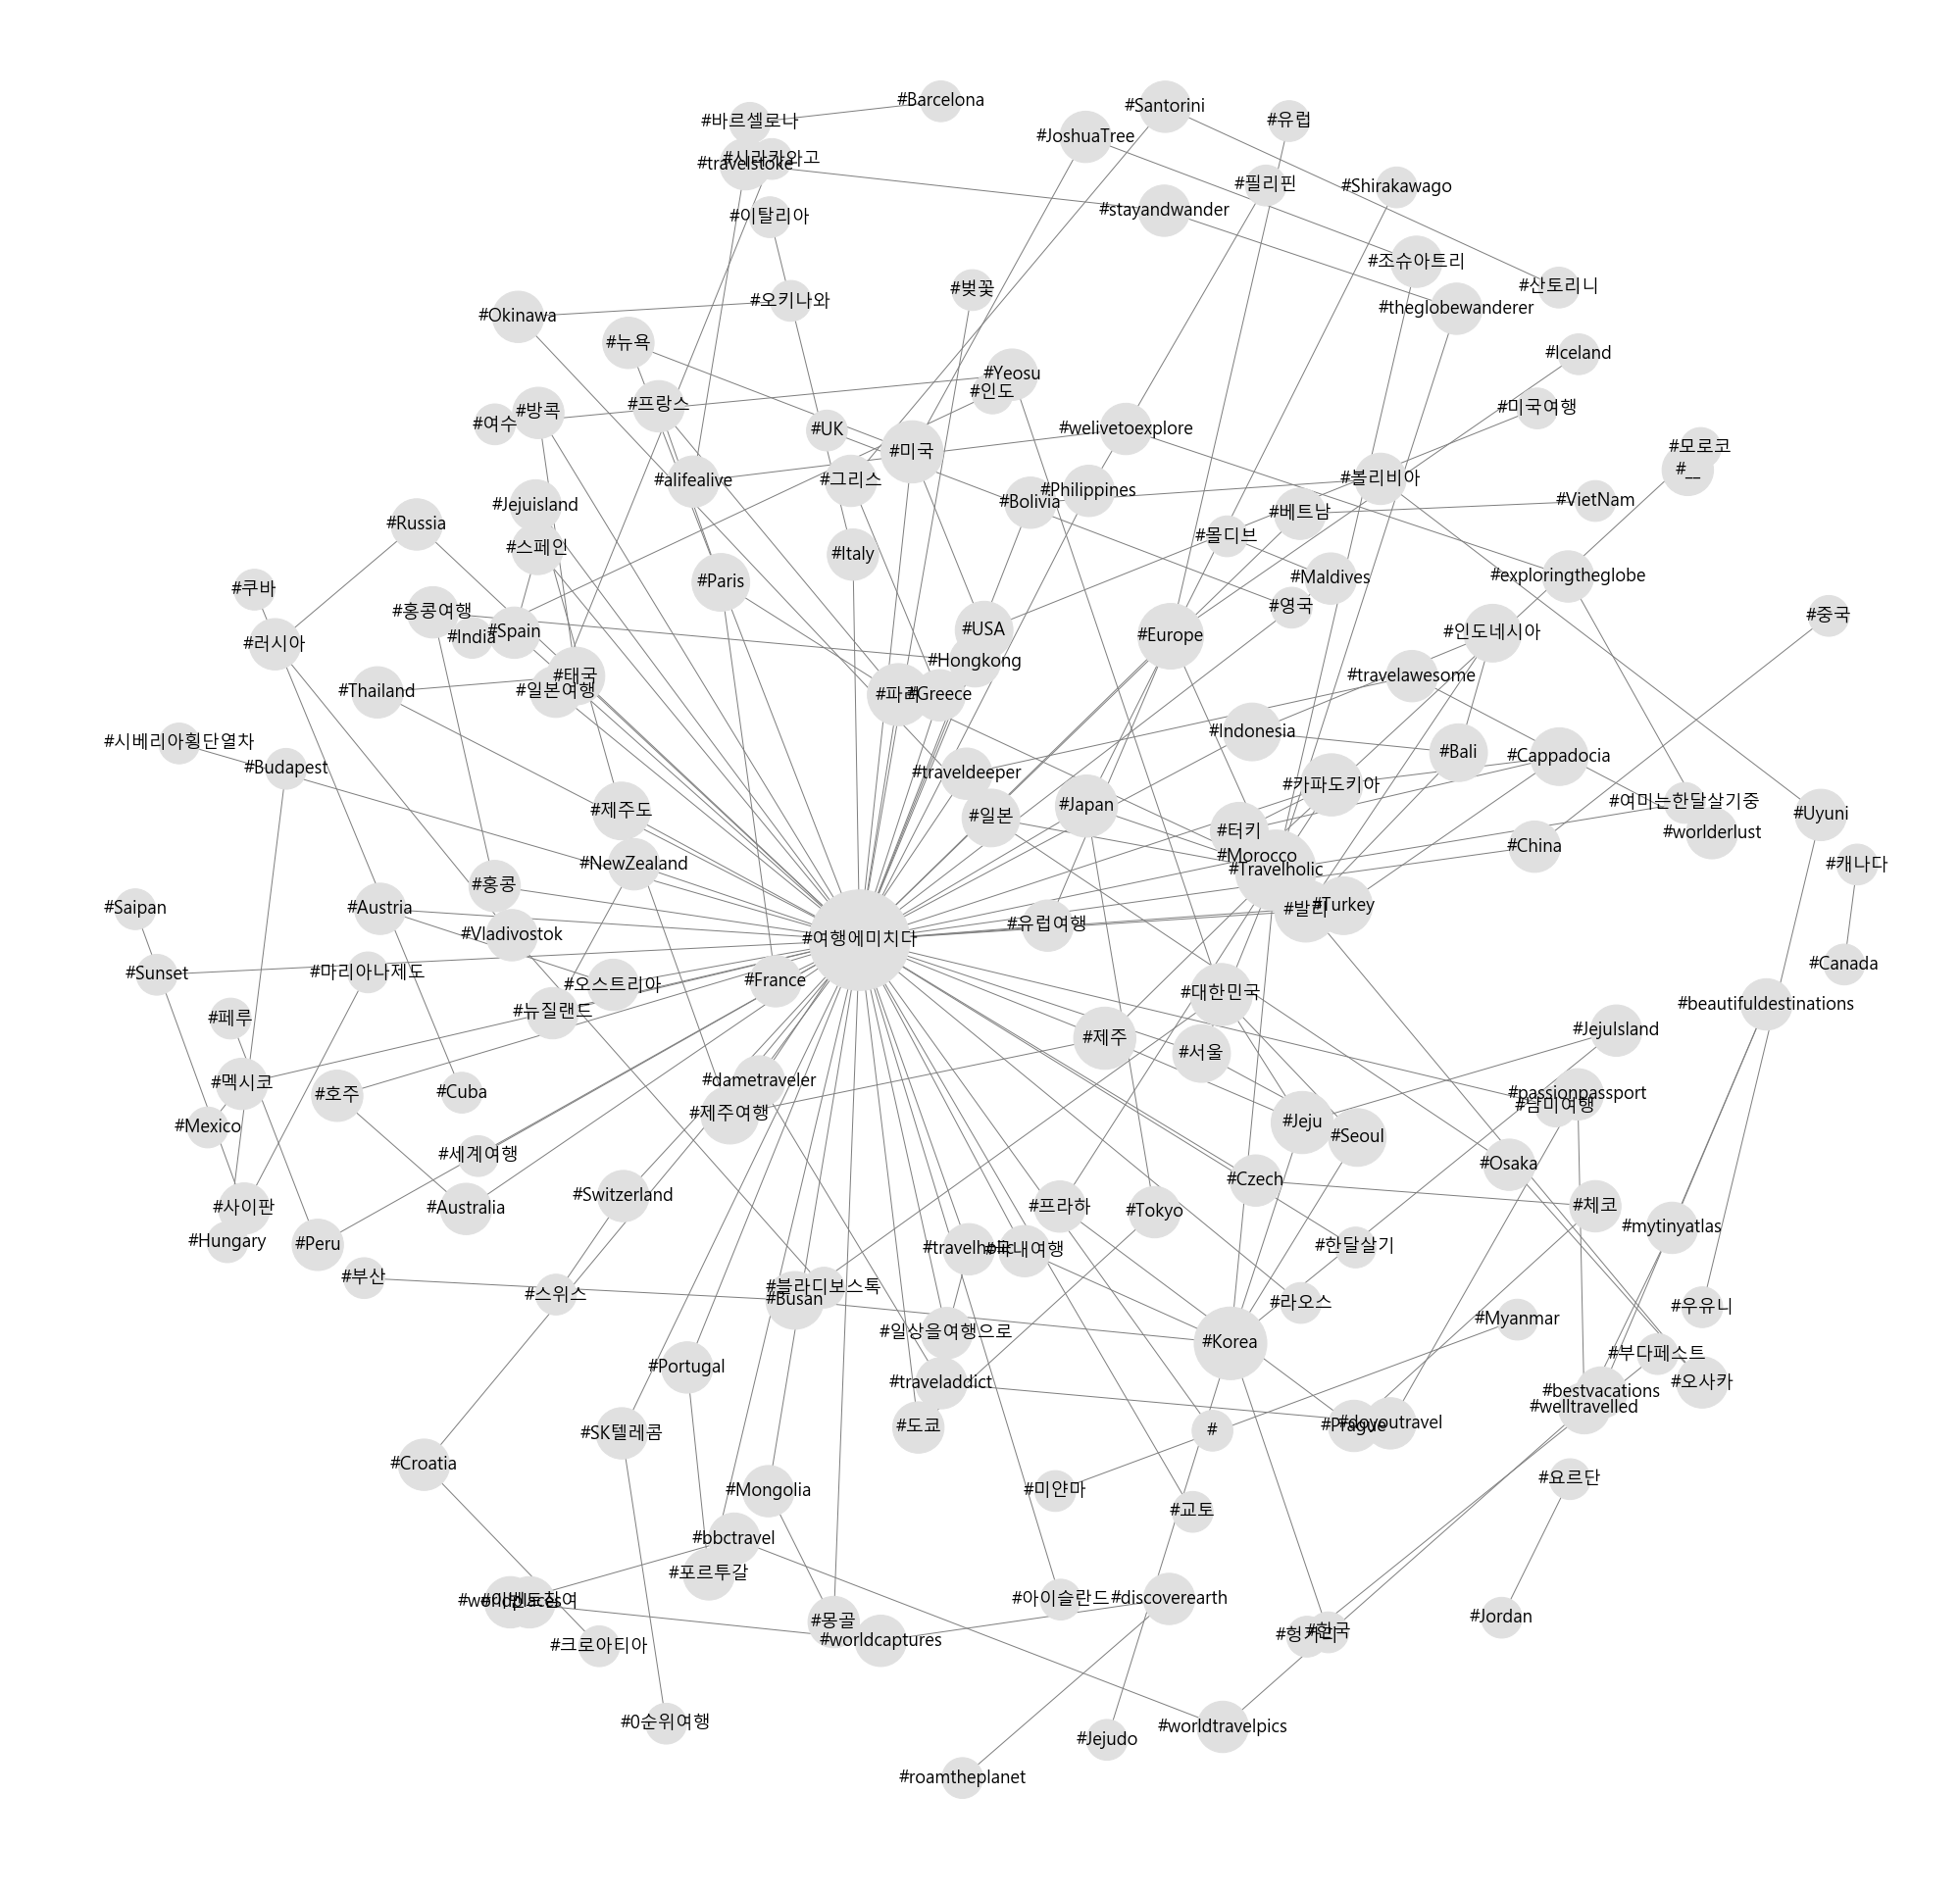

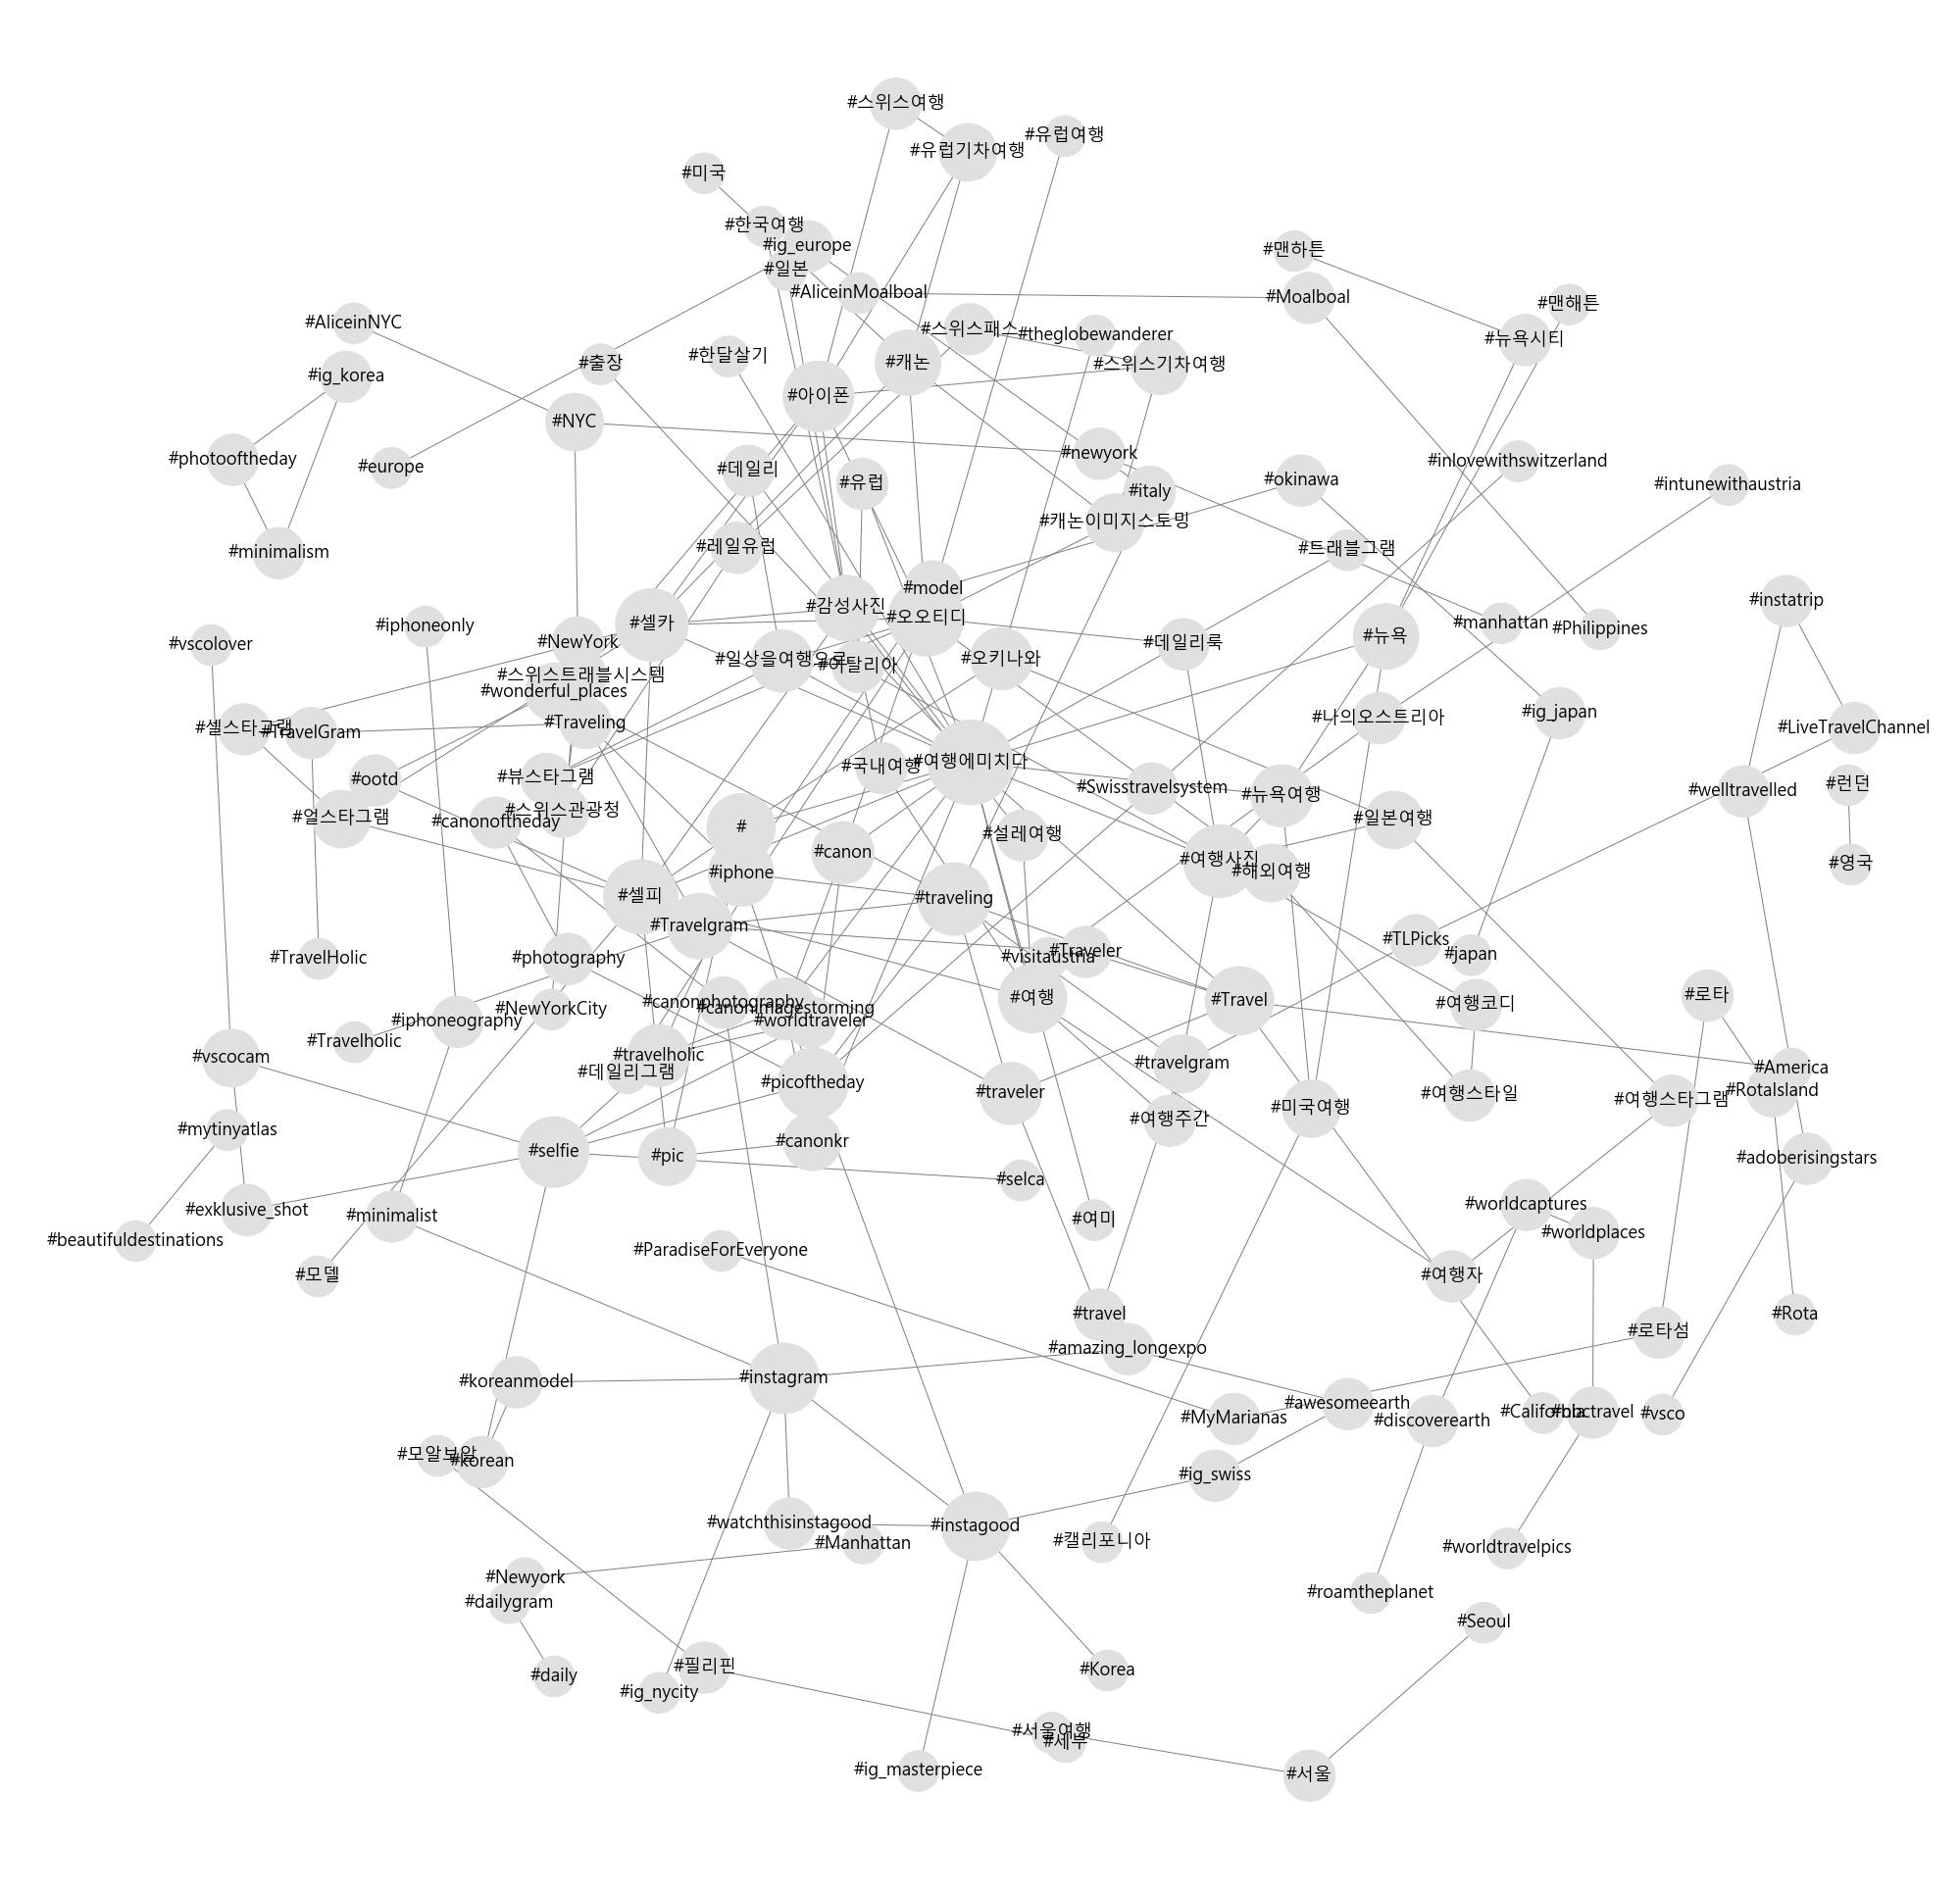

In [267]:
import sys # 파이썬 인터프리터가 제공하는 변수들과 함수들을 직접 제어할 수 있게 해주는 모듈.
import math # 로그개념을 사용하기 위해 math 모듈을 불러온다.
import networkx as nx # 시각화 모듈.
import matplotlib.pyplot as plt # matplotlib의 스타일 관련 기능을 활용할 수 있도록 하는 모듈.


import warnings # warnings 안보이게 해준다.
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# 두 인스타그램 계정 해시태그의 바이그램 분석 결과를 각각 저장한다.
ym_bi_gram = bi_gram(ym_tags_set) 
alice_bi_gram = bi_gram(alice_tags_set)


# 네트워크 생성 결과를 시각적으로 보여준는 함수. 데이터와 데이터의 분석대상 튜플 번호를 매개변수로 받는다.
def networkX_infograph(data, line_num): 
    a = int(line_num) # 매개변수로 받은 튜플 번호의 데이터 형식을 바꾸어준다.

    G = nx.Graph() # 먼저 빈 그래프 생성.

    for x in range(a, a+200): # 주어진 튜플 번호에서 200까지의 튜플의 바이그램 결과를 얻는다.
            G.add_edge(data[x][0][0], data[x][0][1], weight = data[x][1]) # weight = 연결강도.

    sizes = [math.log(G.degree(n) + 1) * 2500 for n in G.nodes()] # 노드 크기 차등 주기.
    plt.figure(figsize = (35, 35)) # 이렇게 정해진 크기를 바탕으로 밑에 코드를 통해 그려주기.

    nx.draw_networkx(G, 
                    pos = nx.spring_layout(G,k=0.8), # k값이 높을 수록 노드 간 거리가 멀어진다.
                    node_size = sizes, # 앞서 설정한 노트 크기 차등 설정.
                    node_color = '#e0e0e0', # 노드 색 지정.
                    edge_color = 'grey', # 테두리 색 지정.
                    font_family = "malgun gothic", # 전체 폰트 설정.
                    label_pos = 0.5, # [0 - 1], Head to Tail
                    with_labels = True, # 해시태그 노드 위에 표시.
                    font_size = 18
                    )

    plt.axis("off")
    return plt.show()          

# travelholic_insta의 경우 10번 째 튜플부터 시작하였고, 앨리스 계정은 70번 째 튜플부터 시작하였다. 앨리스 계정은 관련없는 해시태그가
# 상위권에 많았기 때문이다.
# 이처럼 분석을 시작하고 싶은 튜플의 번호를 지정할 수가 있어서 원하는 범위의 결과를 볼 수 있다.
ym_networkX = networkX_infograph(ym_bi_gram.most_common(), 10) #
alice_networkX = networkX_infograph(alice_bi_gram.most_common(), 70)

ym_networkX # travelholic_insta 계정과 travelaaalice 계정의 네트워크연결 시각화 결과 출력.
alice_networkX

travelaaalice 계정은 이번에도 문제가 많다. 여행과 직접적으로 관련없는 해시태그들이 지나치게 많이 출력되어서 필요한 정보를 얻기에는 불편하다. 다행히 travelholic_insta 계정은 네트워크 연결 결과가 어느 정도는 유의미하게 나오는 것을 확인할 수 있다. 출력된 결과가 앞서 출력한 바이그램과 트라이그램 분석 결과와 유사한 모습을 보이는 것이 그 증거라고 할 수 있다.

다만 함수를 사용해서 바이그램 분석 시 빈도가 높은 순서대로 정리한 자료를 바탕으로 몇 번째 튜플부터 읽어들일지 결정할 수 있기에 여러 번의 과정을 거친다면 괜찮은 출력결과를 기대해 볼 수도 있겠다.